# Data Analytics 111-2 Homework #08
Alexander Nilsson

## 1. (30%) Apply 𝑘-means and hierarchical clustering to the ORL face dataset. 
Set 𝑘 = 2 in 𝑘-means and select 2 clusters in hierarchical clustering. Do the clustering results match the two genders?

In [1]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
import os


load the data 

In [2]:
# Create an empty NumPy array to store the images and a gender column
#400 rows one for each picture, 2576 columns for the image, 1 for the gender
data_matrix = np.zeros((400, 2577))

# Get a list of all PNG files in the directory
files = glob.glob("ORL Faces/*.png")

# Loop through the image files and read them into the data matrix
for i, filename in enumerate(files):
    # Read the image using OpenCV
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to 46x56
    img = cv2.resize(img, (56, 46))
    
    # Flatten the image into a 1D array and store it in the data matrix
    data_matrix[i, :-1] = img.flatten()
    
    # updt
    # Check the filename to determine gender
    if os.path.basename(filename).startswith(("1_", "8_", "10_", "32_")):
        gender = 0
    else:
        gender = 1
    data_matrix[i, -1] = gender

# Print the shape of the data matrix
print(data_matrix.shape)

(400, 2577)


## 𝑘-means

In [3]:
from sklearn.cluster import KMeans

# Split the data into training and testing sets
X = data_matrix[:, :-1]
y = data_matrix[:, -1]

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

/home/aleni212/miniconda3/envs/tf2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

C:\Users\Aleni\miniconda3\envs\gpu_notebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


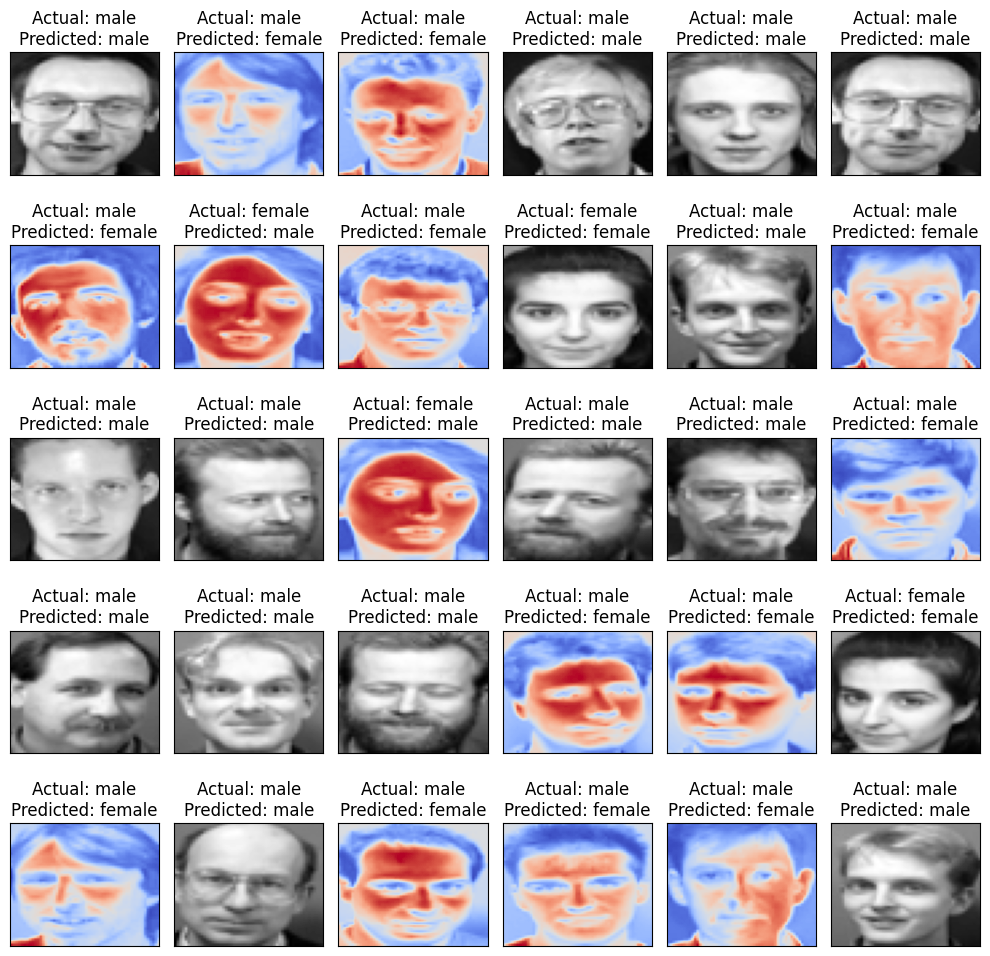

In [10]:
import random

# Set the figure size
plt.figure(figsize=(10, 10))

# Generate 30 random image indices
random_indices = random.sample(range(400), 30)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(data_matrix[:, :-1])

# Loop through the random image indices and print each image
for i, index in enumerate(random_indices):
    # Get the image, actual label, and predicted label
    img = data_matrix[index, :-1].reshape((46, 56))
    actual_gender = "female" if data_matrix[index, -1] == 0 else "male"
    predicted_gender = "female" if labels[index] == 0 else "male"
    
    # Create a subplot for the image
    plt.subplot(5, 6, i+1)
    
    # Print the image
    if actual_gender == predicted_gender:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img, cmap="coolwarm")
    plt.title(f"Actual: {actual_gender}\nPredicted: {predicted_gender}")
    
    # Remove the axis ticks
    plt.xticks([])
    plt.yticks([])

# Adjust the subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y, labels)
print(report)

              precision    recall  f1-score   support

         0.0       0.05      0.25      0.09        40
         1.0       0.86      0.52      0.65       360

    accuracy                           0.49       400
   macro avg       0.46      0.39      0.37       400
weighted avg       0.78      0.49      0.59       400



### Discussion
The k-mean clustering results did not match the two genders well. The precision and recall for class 0 (which represents the female gender in this case) are both low, indicating that the model did not cluster the female images accurately. 

## Hierarchical clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(X)

# Print the predicted labels
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


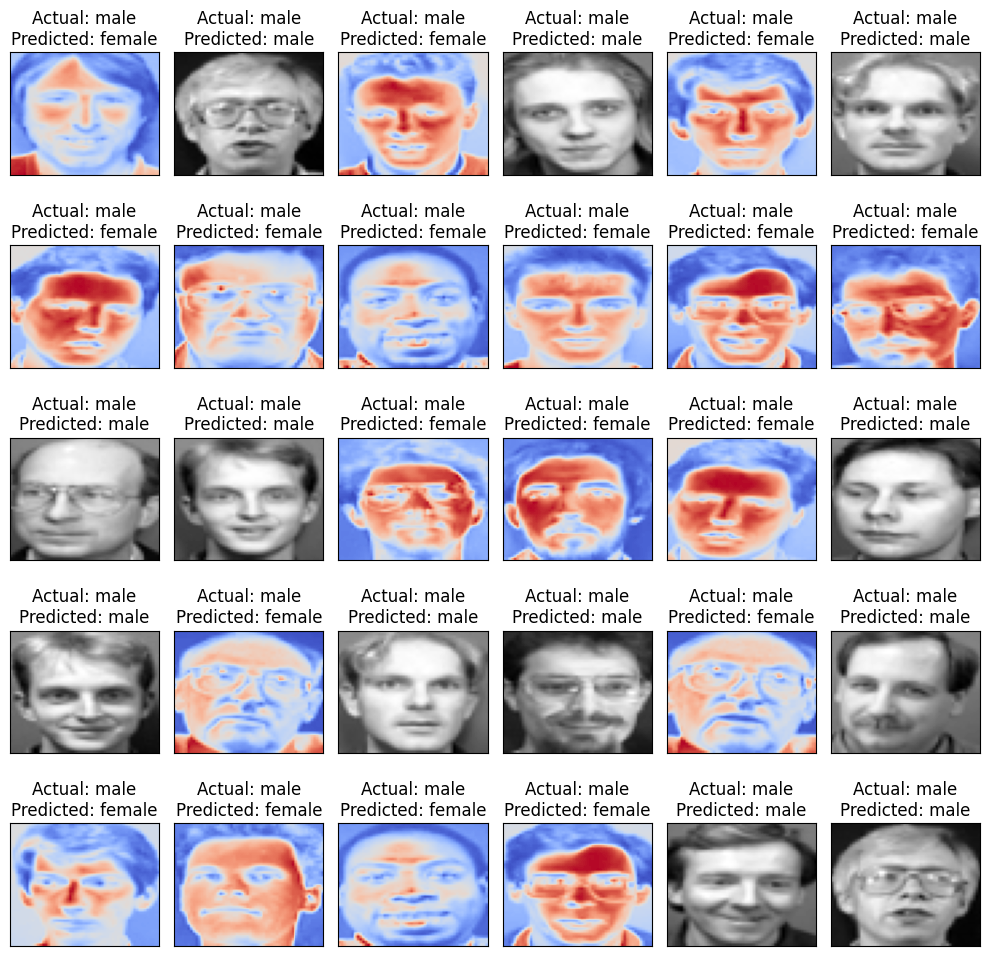

In [14]:
import random

# Set the figure size
plt.figure(figsize=(10, 10))

# Generate 30 random image indices
random_indices = random.sample(range(400), 30)

# Loop through the random image indices and print each image
for i, index in enumerate(random_indices):
    # Get the image, actual label, and predicted label
    img = data_matrix[index, :-1].reshape((46, 56))
    actual_gender = "female" if data_matrix[index, -1] == 0 else "male"
    predicted_gender = "female" if labels[index] == 0 else "male"
    
    # Create a subplot for the image
    plt.subplot(5, 6, i+1)
    
    # Print the image
    if actual_gender == predicted_gender:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img, cmap="coolwarm")
    plt.title(f"Actual: {actual_gender}\nPredicted: {predicted_gender}")
    
    # Remove the axis ticks
    plt.xticks([])
    plt.yticks([])

# Adjust the subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y, labels)
print(report)

              precision    recall  f1-score   support

         0.0       0.10      0.50      0.17        40
         1.0       0.90      0.51      0.65       360

    accuracy                           0.51       400
   macro avg       0.50      0.50      0.41       400
weighted avg       0.82      0.51      0.60       400



## Discussion
Based on this classification report, the hierarchical clustering algorithm also struggled to accurately cluster the female images, as the precision, recall, and F1-score for class 0 are all low. The algorithm performed better on the male images, but overall the results are not very strong. The accuracy of the model is slightly better than the K-means algorithm at 0.51.

## 2. (60%) Drop the “origin” variable from AutoMPG and apply 𝑘-means, hierarchical clustering, and DBSCAN to the modified AutoMPG. 
Do the clustering results match the origin? Compare and discuss the results with those
from the supervised learning methods done in HW#07-EX3.

In [29]:
import pandas as pd

# define the column names
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']

# read the data from the text file
df = pd.read_csv('auto-mpg.data.txt', delim_whitespace=True, names=columns, na_values='?')

df.drop('name', axis=1, inplace=True)
df.dropna(inplace=True)

# print the first few rows of the DataFrame
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [30]:
labels = df['origin']
X = df.drop('origin', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(X_scaled)
hc_labels = hc.labels_

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


C:\Users\Aleni\miniconda3\envs\gpu_notebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


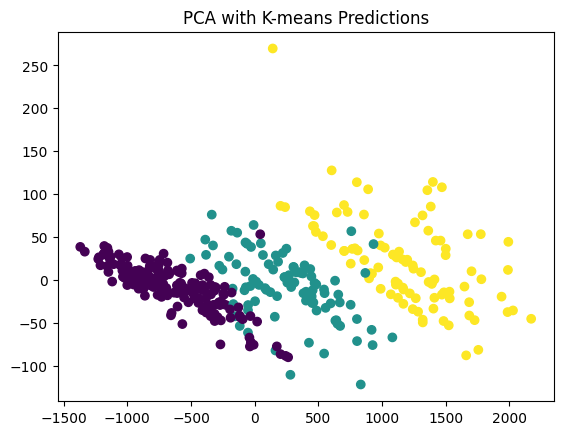

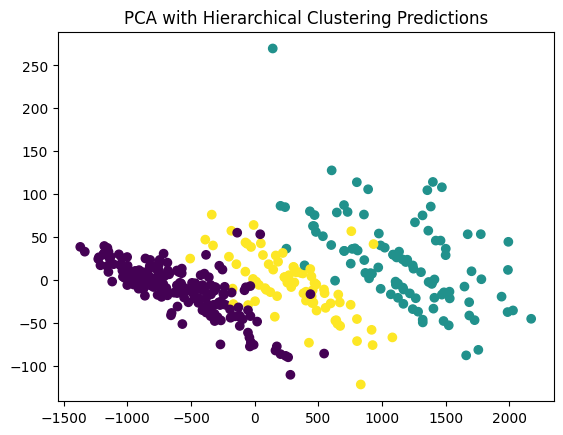

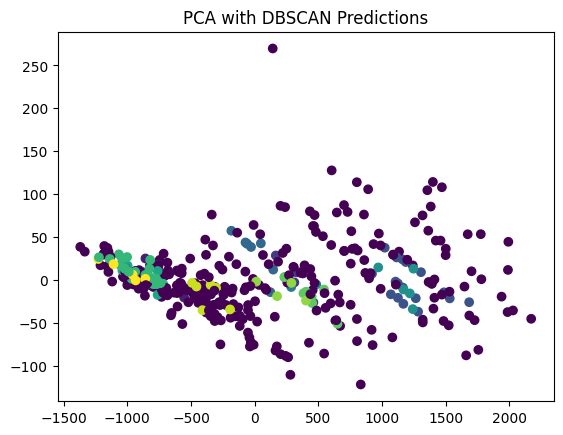

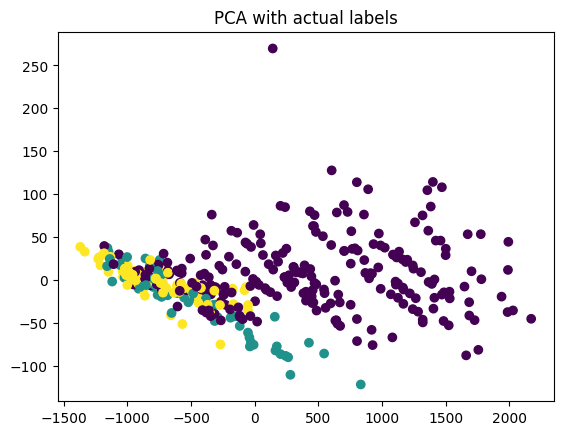

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results with colors representing the predictions
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title("PCA with K-means Predictions")
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels)
plt.title("PCA with Hierarchical Clustering Predictions")
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title("PCA with DBSCAN Predictions")
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("PCA with actual labels")
plt.show()



In [58]:
from sklearn.metrics import normalized_mutual_info_score

# calculate NMI for all clustering algorithms
nmi_scores = [normalized_mutual_info_score(labels, dbscan_labels),
              normalized_mutual_info_score(labels, hc_labels),
              normalized_mutual_info_score(labels, kmeans_labels)]

# print results
print("NMI scores: ", nmi_scores)

NMI scores:  [0.10381080327322903, 0.2608678897890308, 0.23084015118227358]


### compared to HW#07-EX3.

| Algorithm | Accuracy | Precision 1 | Precision 2 | {Precision 3 | Recall 1 | Recall 2 | Recall 3 | F1- score 1 | F1 score 2 | F1-soore 3 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Logistic Regression | 0.7089 | 0.86 | 0.67 | 0.46 | 0.88 | 0.30 | 0.75 | 0.87 | 0.41 | 0.57 |
| k-NN | 0.6582 | 0.72 | 0.62 | 0.43 | 0.95 | 0.25 | 0.38 | 0.82 | 0.36 | 0.40 |
| SVM | 0.7342 | 0.84 | 0.61 | 0.55 | 0.88 | 0.70 | 0.38 | 0.86 | 0.65 | 0.44 |



Comparing the results of supervised and unsupervised algorithms, we can see that the supervised algorithms semed to have performed better in terms of accuracy and percision etc which is expected since supervised algorithms use labeled data for training, whereas unsupervised algorithms do not have access to any label information.

However, the unsupervised clustering algorithms provide a different perspective on the data by grouping similar instances into clusters without any prior knowledge of the actual labels. This can be useful for exploring the data and identifying patterns or anomalies. In this case, we can see that the Hierarchical Clustering algorithm has the highest NMI score, indicating that its predicted clusters are most similar to the actual labels.
